I will use CAPM to find the expected returns for Microsoft (MSFT) and Tesla Inc. (TSLA), based on data from 2020 and 2021. I'll will retrieve the historical data from Yahoo! Finance and find the variables for the CAPM equation, including:

- The current average excess annual return of the US stocks on the S&P 500 (SPY)
- The return on 10-year US Treasury bonds
- The beta value for each stock. (finding the first two values online.)

After calculating the CAPM of each stock, I'll make a statement on which has better-expected returns and which has a lower level of volatility.

In [2]:
#Import all the necessary packages:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn
import matplotlib.pyplot as plt
import datetime
import time

from sklearn.linear_model import LinearRegression
from pandas_datareader import data as web

In [3]:
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2022,1,1)

In [4]:
# [1] Install Pandas ‘DataReader’. 
!pip install pandas-datareader 

# [2] Import data from the web from ‘pandas_datareader’. 
from pandas_datareader import data as web 

In [5]:
# Use the Pandas Datareader to pull data from the web;
# specify the 'ticket' and the website, as well as the start and end dates:
df_spy = web.DataReader('SPY','yahoo',start,end)   

df_spy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,324.890015,322.529999,323.540009,324.869995,59151200.0,313.744507
2020-01-03,323.640015,321.100006,321.160004,322.410004,77709700.0,311.368774
2020-01-06,323.730011,320.359985,320.489990,323.640015,55653900.0,312.556671
2020-01-07,323.540009,322.239990,323.019989,322.730011,40496400.0,311.677795
2020-01-08,325.779999,322.670013,322.940002,324.450012,68296000.0,313.338898


In [8]:
# Pull Tesla’s stock index.
df_tesla = web.DataReader('TSLA','yahoo',start,end)   

# Print the results.
df_tesla.head()  

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001


In [10]:
# Pull Microsoft’s stock index.
df_msft = web.DataReader('MSFT','yahoo',start,end)   

# Print the results.
df_msft.head()  

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,160.729996,158.330002,158.779999,160.619995,22622100.0,156.924393
2020-01-03,159.949997,158.059998,158.320007,158.619995,21116200.0,154.970398
2020-01-06,159.100006,156.509995,157.080002,159.029999,20813700.0,155.371002
2020-01-07,159.669998,157.320007,159.320007,157.580002,21634100.0,153.954330
2020-01-08,160.800003,157.949997,158.929993,160.089996,27746500.0,156.406586


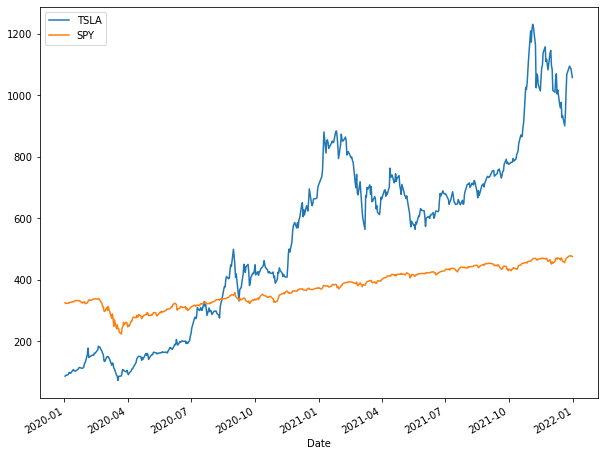

In [11]:
# Closing stock price line plot for ‘Apple’:
df_tesla['Close'].plot(label = 'TSLA', figsize=(10,8))

# Closing stock price line plot for ‘SPY’:
df_spy['Close'].plot(label = 'SPY')
plt.legend()

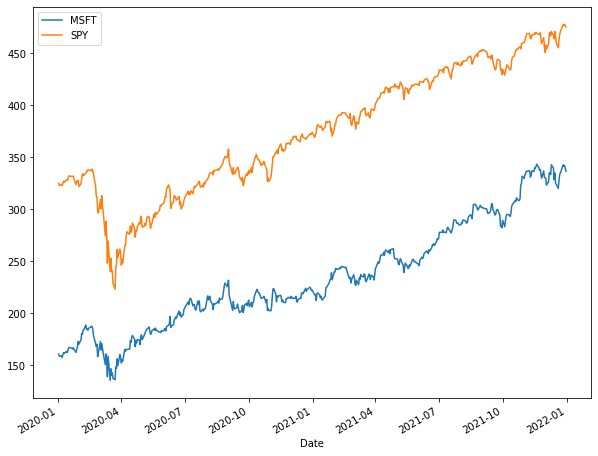

In [12]:
# Closing stock price line plot for ‘Apple’:
df_msft['Close'].plot(label = 'MSFT', figsize=(10,8))

# Closing stock price line plot for ‘SPY’:
df_spy['Close'].plot(label = 'SPY')
plt.legend()

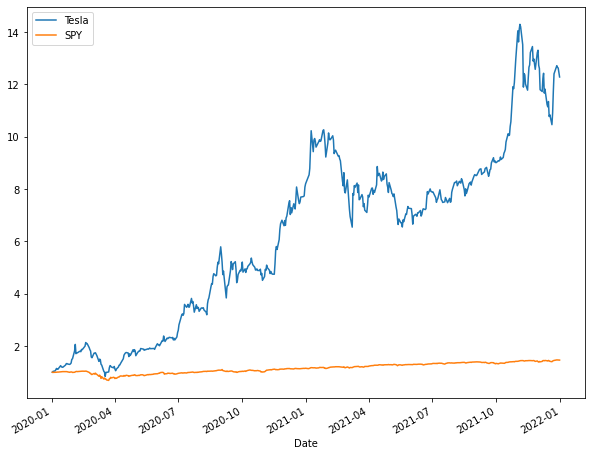

In [13]:
# [1a] Calculate the cumulative sum of closing prices for 'Tesla'’ stocks; 
# stores sum in a new column named 'Cumu’:
df_tesla['Cumu'] = df_tesla['Close']/df_tesla['Close'].iloc[0]


# [1b] Calculate the cumulative sum of closing prices for ‘SPY’ stocks; 
# stores sum in a new column named 'Cumu’:
df_spy['Cumu'] = df_spy['Close']/df_spy['Close'].iloc[0] #TBA

# [2] Plot line graphs for the calculated ‘Cumu’ columns for 
# both ‘Apple’ and ‘SPY’ stocks:
df_tesla['Cumu'].plot(label = 'Tesla', figsize=(10,8))
df_spy['Cumu'].plot(label = 'SPY')
plt.legend()

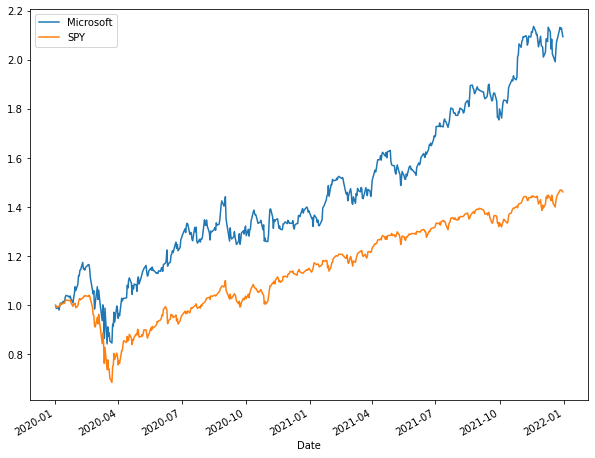

In [14]:
# [1a] Calculate the cumulative sum of closing prices for ‘Microsoft’ stocks; 
# stores sum in a new column named 'Cumu’:
df_msft['Cumu'] = df_msft['Close']/df_msft['Close'].iloc[0]


# [1b] Calculate the cumulative sum of closing prices for ‘SPY’ stocks; 
# stores sum in a new column named 'Cumu’:
df_spy['Cumu'] = df_spy['Close']/df_spy['Close'].iloc[0] #TBA

# [2] Plot line graphs for the calculated ‘Cumu’ columns for 
# both ‘Apple’ and ‘SPY’ stocks:
df_msft['Cumu'].plot(label = 'Microsoft', figsize=(10,8))
df_spy['Cumu'].plot(label = 'SPY')
plt.legend()

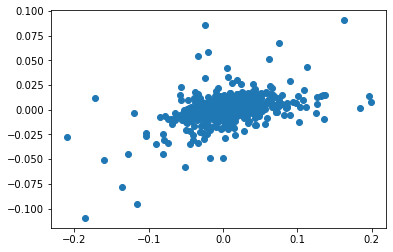

In [15]:
# [1] Calculate daily returns and 
# [2] percentage change using ‘pandas pct_change()’: Tesla
df_tesla['daily_ret'] = df_tesla['Close'].pct_change(1) 
df_spy['daily_ret'] = df_spy['Close'].pct_change(1)

# [3] Plot the daily returns on a scatterplot:
plt.scatter(df_tesla['daily_ret'],df_spy['daily_ret'])

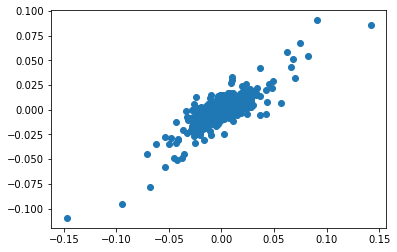

In [16]:
# [1] Calculate daily returns and 
# [2] percentage change using ‘pandas pct_change()’: Microsoft
df_msft['daily_ret'] = df_msft['Close'].pct_change(1) 
df_spy['daily_ret'] = df_spy['Close'].pct_change(1)

# [3] Plot the daily returns on a scatterplot:
plt.scatter(df_msft['daily_ret'],df_spy['daily_ret'])

In [19]:
# [1] Join the DataFrames with the close value column for Tesla
daily_prices_t = pd.concat([df_tesla['Close'], df_spy['Close']], axis=1)  
# [2] Set column labels.
daily_prices_t.columns = ['Tesla', 'SPY']  

# [3] Print the new table.
print(daily_prices_t.head()) 

                Tesla         SPY
Date                             
2020-01-02  86.052002  324.869995
2020-01-03  88.601997  322.410004
2020-01-06  90.307999  323.640015
2020-01-07  93.811996  322.730011
2020-01-08  98.428001  324.450012


In [20]:
# [1] Join the DataFrames with the close value column for Microsoft
daily_prices_m = pd.concat([df_msft['Close'], df_spy['Close']], axis=1)  
# [2] Set column labels.
daily_prices_m.columns = ['Microsoft', 'SPY']  

# [3] Print the new table.
print(daily_prices_m.head()) 

             Microsoft         SPY
Date                              
2020-01-02  160.619995  324.869995
2020-01-03  158.619995  322.410004
2020-01-06  159.029999  323.640015
2020-01-07  157.580002  322.730011
2020-01-08  160.089996  324.450012


In [22]:
# Get the percentage change for Tesla
daily_returns_t = daily_prices_t.pct_change(1)  
# Remove the first row (as we don’t have any data from the previous day, 2021-01-03)
clean_daily_returns_t = daily_returns_t.dropna(axis=0)
# Print the new DataFrame.  
print(clean_daily_returns_t.head()) 

               Tesla       SPY
Date                          
2020-01-03  0.029633 -0.007572
2020-01-06  0.019255  0.003815
2020-01-07  0.038801 -0.002812
2020-01-08  0.049205  0.005330
2020-01-09 -0.021945  0.006781


In [23]:
# Get the percentage change for Microsoft
daily_returns_m = daily_prices_m.pct_change(1)  
# Remove the first row (as we don’t have any data from the previous day, 2021-01-03)
clean_daily_returns_m = daily_returns_m.dropna(axis=0)
# Print the new DataFrame.  
print(clean_daily_returns_m.head()) 

            Microsoft       SPY
Date                           
2020-01-03  -0.012452 -0.007572
2020-01-06   0.002585  0.003815
2020-01-07  -0.009118 -0.002812
2020-01-08   0.015928  0.005330
2020-01-09   0.012493  0.006781


In [32]:
# Reshape ‘SPY’ data to 2D.
X = clean_daily_returns_t['SPY'].values.reshape(-1, 1)  
# Reshape ‘Tesla’ data to 2D.
y = clean_daily_returns_t['Tesla'].values.reshape(-1, 1)  

In [38]:
# Run the linear regression test for Tesla.
lr = LinearRegression()  
# Fit the model.
lr.fit(X, y) 

LinearRegression()

In [39]:
# Check/Call the coefficient (beta value).
lr.coef_  

array([[1.34497477]])

In [40]:
# Check/call the intercept (c).
lr.intercept_ 

array([0.00489288])

In [42]:
# Set the the x coefficient the constant (intercept) y = beta*x + c
y_pred = lr.coef_ * X + lr.intercept_

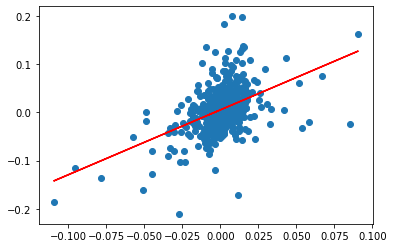

In [43]:
# [1] Draw the scatterplot for Tesla using Matplotlib. 
plt.scatter(X,y) 
 # [2] Plot X and predicted y as a line;[2a] Set the line colour to red.
plt.plot(X, y_pred, color='red') 

In [44]:
# Reshape ‘SPY’ data to 2D for Microsoft
X = clean_daily_returns_m['SPY'].values.reshape(-1, 1)  
# Reshape ‘Microsoft’ data to 2D.
y = clean_daily_returns_m['Microsoft'].values.reshape(-1, 1)  

In [45]:
# Run the linear regression test for Microsoft.
lr = LinearRegression()  
# Fit the model.
lr.fit(X, y) 

LinearRegression()

In [46]:
# Check/Call the coefficient (beta value).
lr.coef_  

array([[1.14398066]])

In [47]:
# Check/call the intercept (c).
lr.intercept_ 

array([0.00069205])

In [48]:
# Set the the x coefficient the constant (intercept) y = beta*x + c
y_pred = lr.coef_ * X + lr.intercept_

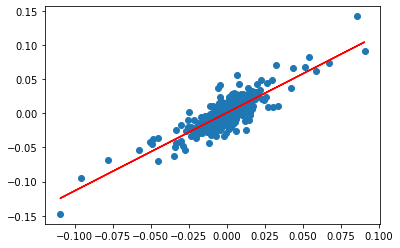

In [31]:
# [1] Draw the scatterplot for Microsoft using Matplotlib. 
plt.scatter(X,y) 
 # [2] Plot X and predicted y as a line;[2a] Set the line colour to red.
plt.plot(X, y_pred, color='red') 